In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("bank-full.csv", delimiter=";")

The dataset is converted to pandas dataframe. The dataset looks messy and is seperated by semicolon. Thus delimiter=";" is used to properly arrange the data

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

There are 45,211 rows which means 45,211 customers

17 attributes per customer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age:Age of the client in years

job:Type of job the client has

marital:Marital status of the client

education:Education level of the client

default:Whether the client has credit default

balance:Average yearly bank balance

housing:Whether the client has a housing loan

loan:Whether the client has a personal loan

contact:Communication type used to contact the client

day:Day of the month when last contacted

month:Month when last contacted

duration:Duration of the last call in seconds

campaign:Number of contacts made during the current campaign

pdays:Days since the client was last contacted

previous:Number of contacts before this campaign

poutcome:Outcome of the previous marketing campaign

y:Whether the client subscribed to the term deposit(Target variable)

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['y'].value_counts()

,count
y,
no,39922
yes,5289


**MISSING VALUE HANDLING**

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In this data the null value count is 0. but it has many missing values which are are represented as "unknown", not NaN.

In [ ]:
(df == "unknown").sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0


In [ ]:
df.replace("unknown", np.nan, inplace=True)

For easy understanding,the unknown is converted to nan using np.nan

In [ ]:
df = df.drop(columns=['poutcome'])

poutcome has too many null values, thus it is dropped

In [ ]:
df.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0


In [ ]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include="object").columns

In [ ]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-518003605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1077209983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df["y"].value_counts()

,count
y,
no,39922
yes,5289


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
45206,False
45207,False
45208,False
45209,False


In [ ]:
df.duplicated().sum()

np.int64(0)

88% NO, 12% YES means model will be biased.

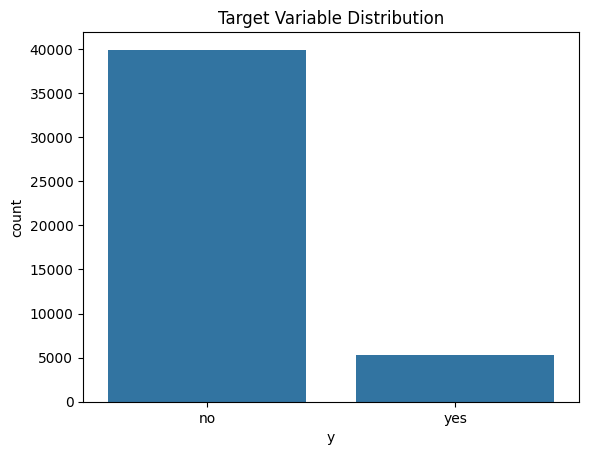

In [ ]:
sns.countplot(x="y", data=df)
plt.title("Target Variable Distribution")
plt.show()

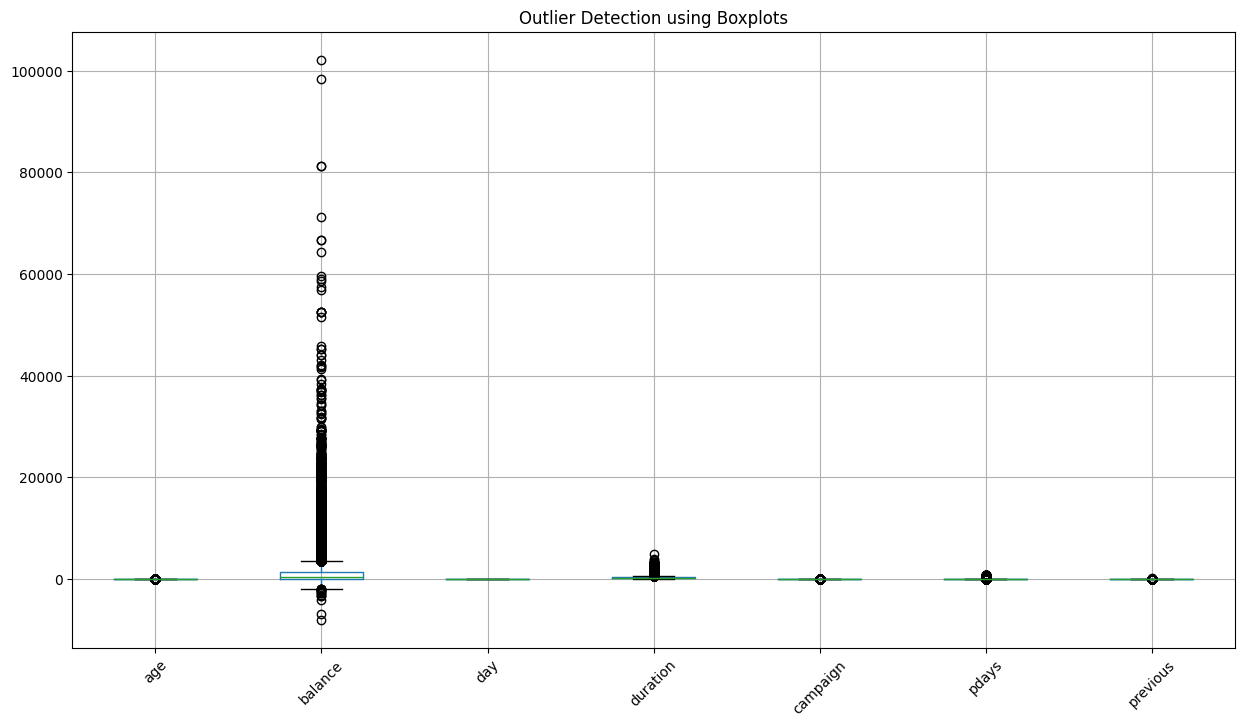

In [ ]:
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Detection using Boxplots")
plt.show()

In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) |
            (df[numerical_cols] > (Q3 + 1.5 * IQR)))

outliers.sum()

,0
age,487
balance,4729
day,0
duration,3235
campaign,3064
pdays,8257
previous,8257


In [ ]:
df[numerical_cols] = df[numerical_cols].clip(lower=lower_limit, upper=upper_limit, axis=1)

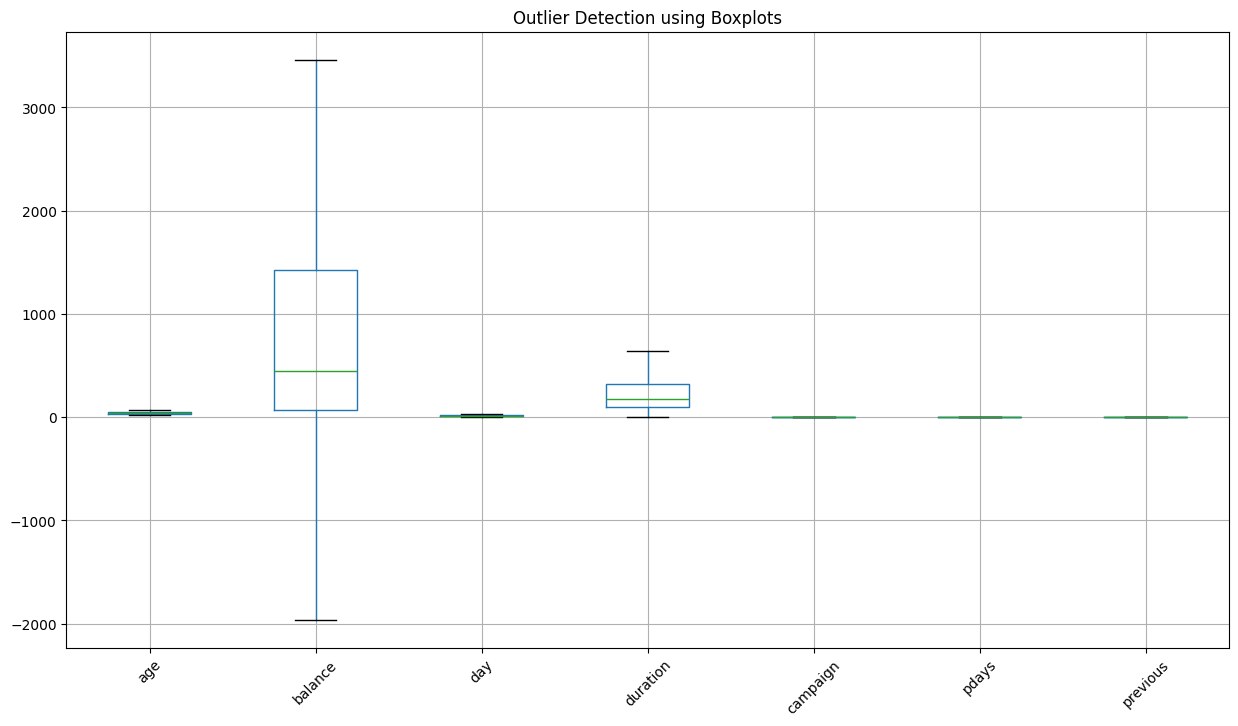

In [ ]:
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Detection using Boxplots")
plt.show()

In [ ]:
skewness = df[numerical_cols].skew().sort_values(ascending=False)
skewness

,0
campaign,1.099115
balance,1.097802
duration,1.037574
age,0.529715
day,0.093079
pdays,0.000000
previous,0.000000


In [ ]:
df.shape

(45211, 16)

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Analysis

/tmp/ipython-input-2126094157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='viridis')


Text(0.5, 1.0, 'Distribution of Target Variable')

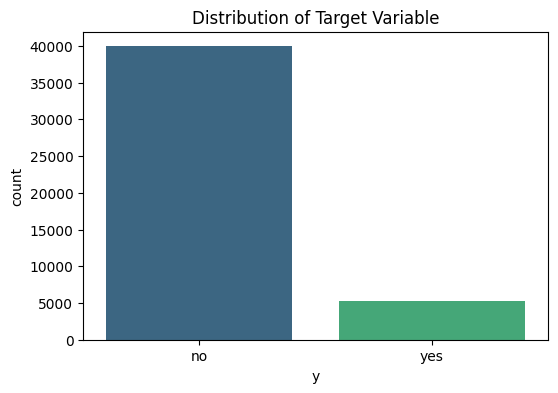

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Distribution of Target Variable')

Text(0.5, 0.98, 'Histograms of Numerical Features')

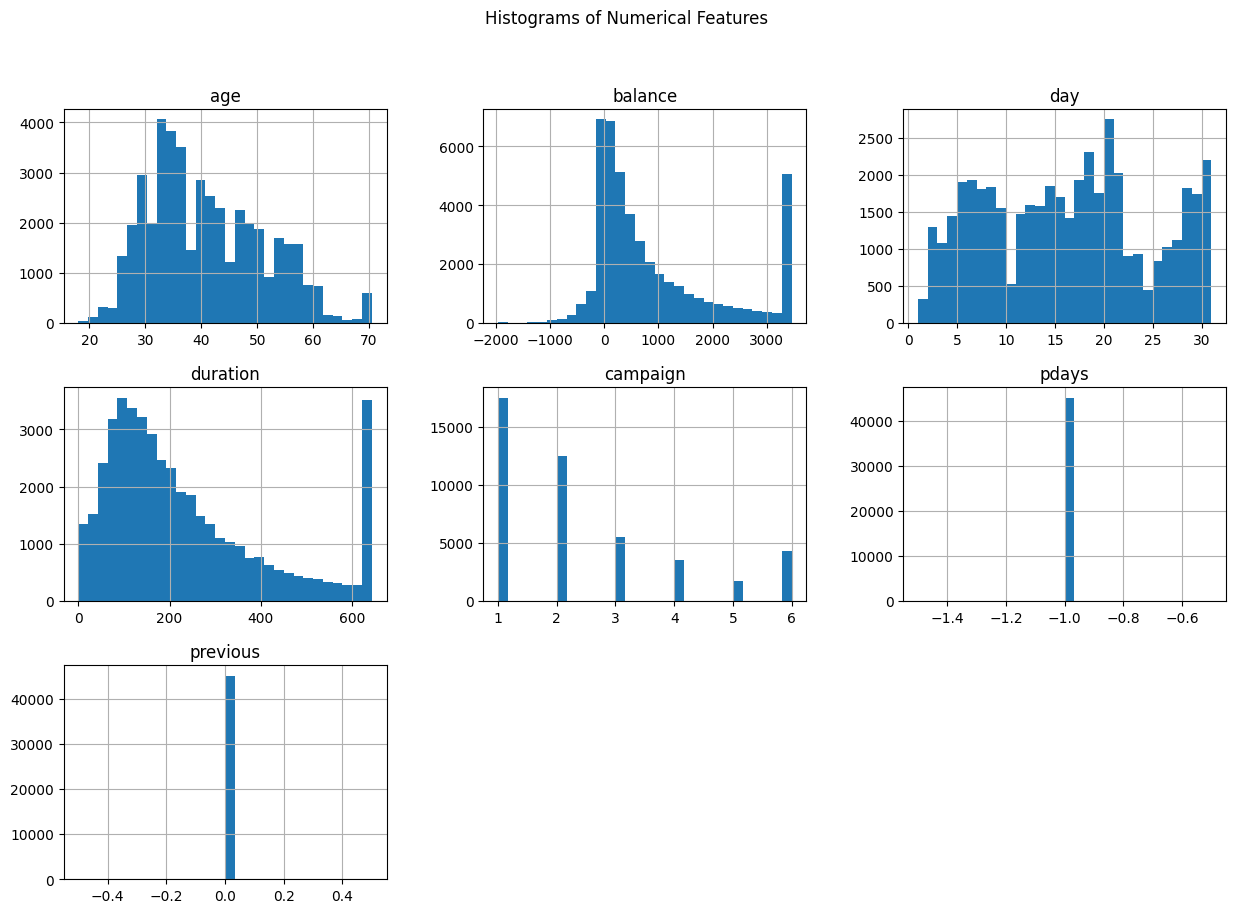

In [ ]:
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')

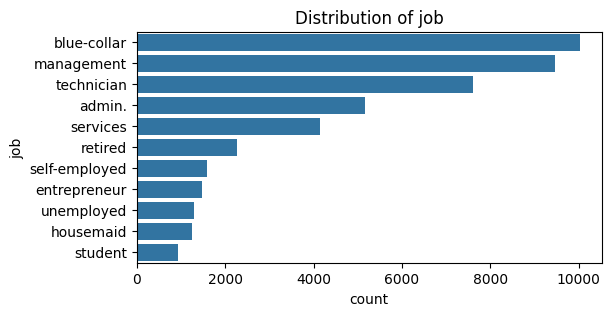

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(y=df['job'], order=df['job'].value_counts().index)
plt.title(f"Distribution of job")
plt.show()

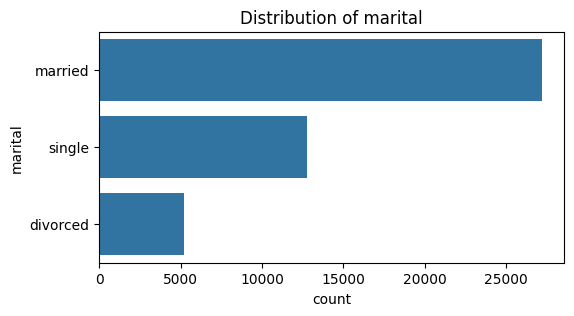

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(y=df['marital'], order=df['marital'].value_counts().index)
plt.title(f"Distribution of marital")
plt.show()

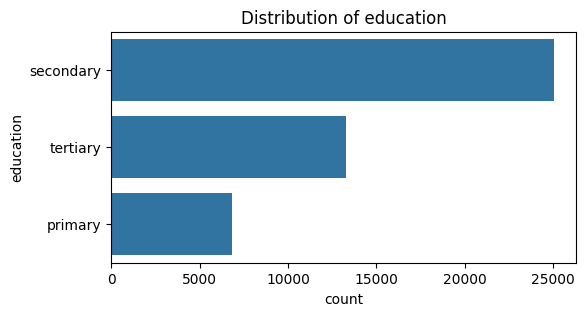

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(y=df['education'], order=df['education'].value_counts().index)
plt.title(f"Distribution of education")
plt.show()

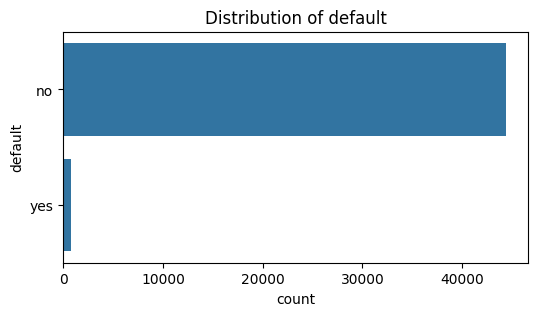

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(y=df['default'], order=df['default'].value_counts().index)
plt.title(f"Distribution of default")
plt.show()

**Encoding**

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.drop('y', errors='ignore')
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

The categorical values are encoded using One Hot Encoding method

In [ ]:
df_encoded

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,2143,5,261,1,-1,0,no,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44.0,29,5,151,1,-1,0,no,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33.0,2,5,76,1,-1,0,no,False,True,...,False,False,False,False,False,False,True,False,False,False
3,47.0,1506,5,92,1,-1,0,no,True,False,...,False,False,False,False,False,False,True,False,False,False
4,33.0,1,5,198,1,-1,0,no,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,825,17,643,3,-1,0,yes,False,False,...,False,False,False,False,False,False,False,True,False,False
45207,70.5,1729,17,456,2,-1,0,yes,False,False,...,False,False,False,False,False,False,False,True,False,False
45208,70.5,3462,17,643,5,-1,0,yes,False,False,...,False,False,False,False,False,False,False,True,False,False
45209,57.0,668,17,508,4,-1,0,no,True,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_encoded['y'] = df['y'].map({'no': 0, 'yes': 1})

The Yes and No are mapped to 1 and 0 respectively for easy processing

In [ ]:
df_encoded

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,2143,5,261,1,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44.0,29,5,151,1,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33.0,2,5,76,1,-1,0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
3,47.0,1506,5,92,1,-1,0,0,True,False,...,False,False,False,False,False,False,True,False,False,False
4,33.0,1,5,198,1,-1,0,0,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,825,17,643,3,-1,0,1,False,False,...,False,False,False,False,False,False,False,True,False,False
45207,70.5,1729,17,456,2,-1,0,1,False,False,...,False,False,False,False,False,False,False,True,False,False
45208,70.5,3462,17,643,5,-1,0,1,False,False,...,False,False,False,False,False,False,False,True,False,False
45209,57.0,668,17,508,4,-1,0,0,True,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_encoded.shape

(45211, 37)

In [ ]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

The data is split into train and test data for training and testing the model

The data is imbalanced thus strayify is used

In [ ]:
X_train.shape, X_test.shape ,y_train.shape,y_train.shape

((36168, 36), (9043, 36), (36168,), (36168,))

In [ ]:
y_train.value_counts()

,count
y,
0,31937
1,4231


In [ ]:
y_test.value_counts()

,count
y,
0,7985
1,1058


Yeo Johnson PowerTransformer

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

**SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pt)
X_test_scaled = scaler.transform(X_test_pt)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_new, y_train_new = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
y_train_new.value_counts()

,count
y,
0,31937
1,31937


The data is scaled using StandardScaler

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=1000)
Lr.fit(X_train_new, y_train_new)
y_lr = Lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_lr))
print(classification_report(y_test, y_lr))

Accuracy: 0.7963065354417782
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      7985
           1       0.34      0.81      0.48      1058

    accuracy                           0.80      9043
   macro avg       0.66      0.80      0.68      9043
weighted avg       0.90      0.80      0.83      9043



K NEAREST NEIGHBOR

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_new, y_train_new)
y_knn = knn.predict(X_test_scaled)

print("KNN")
print(classification_report(y_test, y_knn))

KNN
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7985
           1       0.32      0.66      0.43      1058

    accuracy                           0.80      9043
   macro avg       0.64      0.74      0.66      9043
weighted avg       0.87      0.80      0.83      9043



DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt.fit(X_train_new, y_train_new)
y_dt = dt.predict(X_test_scaled)

print("Decision Tree")
print(classification_report(y_test, y_dt))

Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      7985
           1       0.33      0.78      0.46      1058

    accuracy                           0.79      9043
   macro avg       0.65      0.78      0.66      9043
weighted avg       0.89      0.79      0.82      9043



RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)
rf.fit(X_train_new, y_train_new)
y_rf = rf.predict(X_test_scaled)

print("Random Forest")
print(classification_report(y_test, y_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7985
           1       0.50      0.56      0.53      1058

    accuracy                           0.88      9043
   macro avg       0.72      0.74      0.73      9043
weighted avg       0.89      0.88      0.89      9043



NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_new, y_train_new)
y_nb = nb.predict(X_test_scaled)

print("Naive Bayes")
print(classification_report(y_test, y_nb))

Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7985
           1       0.34      0.37      0.36      1058

    accuracy                           0.84      9043
   macro avg       0.63      0.64      0.63      9043
weighted avg       0.85      0.84      0.85      9043



SUPPORT VECTOR MACHINE

In [ ]:
models = {
    "Logistic Regression":y_lr,
    "KNN":y_knn,
    "Decision Tree":y_dt,
    "Random Forest":y_rf,
    "Naive Bayes":y_nb,
}

for name, preds in models.items():
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.4f}")

Logistic Regression Accuracy: 0.7963
KNN Accuracy: 0.8001
Decision Tree Accuracy: 0.7850
Random Forest Accuracy: 0.8831
Naive Bayes Accuracy: 0.8436


The best model among this is random forest

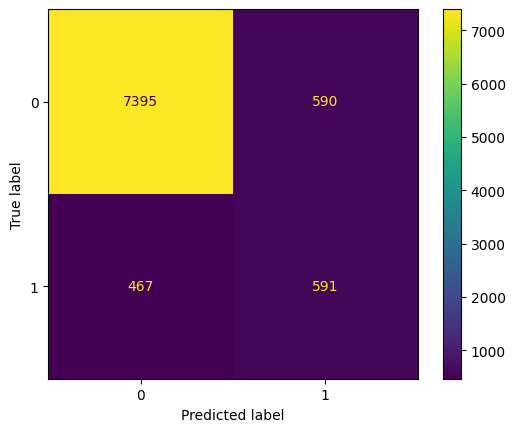

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_rf)
plt.show()

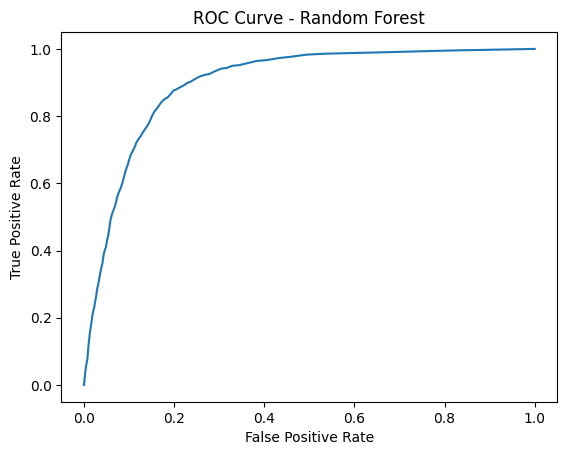

AUC: 0.898758601015846


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_rf = rf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.show()

AUC =roc_auc_score(y_test, y_prob_rf)
print("AUC:",AUC )


It has a good AUC score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [200, 500],
    'max_depth': [None, 30],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 0.5]
}

rs = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),params,n_iter=10,scoring='roc_auc',cv=5,n_jobs=-1)

rs.fit(X_train, y_train)
best_rf = rs.best_estimator_

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
best_rf = rs.best_estimator_
print(best_rf)

RandomForestClassifier(min_samples_leaf=5, n_estimators=500, n_jobs=-1,
                       random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Rfc = RandomForestClassifier(max_depth=30,n_estimators=500,min_samples_leaf=5,random_state=42,n_jobs=-1)
Rfc.fit(X_train_new, y_train_new)
y_rf = Rfc.predict(X_test_scaled)

print("Random Forest")
print(classification_report(y_test, y_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      7985
           1       0.45      0.69      0.54      1058

    accuracy                           0.86      9043
   macro avg       0.70      0.79      0.73      9043
weighted avg       0.90      0.86      0.88      9043



In [ ]:
import joblib
joblib.dump(rf, "model.pkl", compress=3)


['model.pkl']